EDA Notebook

# Import Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df1 = pd.read_csv("Training Set Values.csv")
df2 = pd.read_csv("Training Set Labels.csv")
df = pd.concat([df1, df2.drop('id', axis=1)], axis=1)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### Missing Data Observations

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

**There will likely be a lot of dummy features required as there is an overwhelming amount of object features in this dataset. I think reducing the features on this dataset may be necessary.  Will look for redundant and informative features below.**

**Features with missing values**

1. funder ~4k

2. installer ~4k (maybe same as funder)

3. subvillage ~370

4. public_meeting ~3.4k

5. scheme_management ~4k

6. scheme_name ~28k

7. permit ~3k

In [9]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


**Features with outliers**

1. amount_tsh
2. population

### Top 5 Values Analysis

In [10]:
for col in df.columns:
    print('-------------------------')
    print('Top 5 Values for:', col)
    print('Number of unique values:', df[col].nunique())
    print(df[col].value_counts(dropna=False).head(10))
    print('-------------------------')

-------------------------
Top 5 Values for: id
Number of unique values: 59400
2047     1
72310    1
49805    1
51852    1
62091    1
64138    1
57993    1
60040    1
33413    1
35460    1
Name: id, dtype: int64
-------------------------
-------------------------
Top 5 Values for: amount_tsh
Number of unique values: 98
0.0       41639
500.0      3102
50.0       2472
1000.0     1488
20.0       1463
200.0      1220
100.0       816
10.0        806
30.0        743
2000.0      704
Name: amount_tsh, dtype: int64
-------------------------
-------------------------
Top 5 Values for: date_recorded
Number of unique values: 356
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
2011-03-18    497
2011-03-19    466
2013-02-04    464
2013-01-29    459
2011-03-04    458
Name: date_recorded, dtype: int64
-------------------------
-------------------------
Top 5 Values for: funder
Number of unique values: 1897
Government Of Tanzania    9084
NaN                     

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64
-------------------------
-------------------------
Top 5 Values for: source
Number of unique values: 10
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64
-------------------------
-------------------------
Top 5 Values for: source_type
Number of unique values: 7
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64
-------------------------
-------------------------
Top 5 Values for: so

### Drop Redundant & Not Informative Features

**Features to drop**

1. wpt_name - Too many to bin, no big players
2. num_private - No information, 98% missing
3. subvillage - Too many to bin, no big players
4. recorded_by - No information
5. scheme_name - 47% NaN values, and too many to bin with no big players
6. extraction_type_group - Redundant 
7. payment_type - Redundant -> payment
8. quality_group - Redundant as water_quality has a bit more detail
9. quantity_group - Redundant ->  quantity
10. source_type - Redundant as source has a bit more detail
11. waterpoint_type_group - Redundant as waterpoint_type has a bit more detail
12. ward - Too many to bin, no big players
13. region_code - Redundant -> region
14. district_code - Redundant -> region
15. lga - Redundant -> region
16. id - No duplicates

# Data Exploration & Feature Engineering

## id Duplicates? Correlations?

In [11]:
df.sort_values('id').head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
9410,0,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,NaN,GeoData Consultants Ltd,VWC,NaN,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
18428,1,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,NaN,NaN,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
12119,2,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
10629,3,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2343,4,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
5262,5,50.0,2011-02-26,Private,28,Private,39.286124,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,NaN,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
29892,6,0.0,2012-10-20,Government Of Tanzania,0,Government,33.229880,-3.852983,Mission,0,Internal,Ngaganulwa,Shinyanga,17,3,Shinyanga Rural,Usanda,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,non functional
6942,7,0.0,2011-03-23,Water,0,Gover,36.313619,-6.719257,Itawi,0,Rufiji,Mwangaza,Dodoma,1,1,Mpwapwa,Wotta,0,True,GeoData Consultants Ltd,VWC,Lwih,True,0,other,other,other,vwc,user-group,never pay,never pay,milky,milky,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring,functional
29473,8,0.0,2011-04-07,Water,0,Commu,35.939445,-6.014358,Kwa Chiswagala,0,Wami / Ruvu,Mazengo,Dodoma,1,5,Dodoma Urban,Ipala,0,True,GeoData Consultants Ltd,VWC,Ipal,False,0,mono,mono,motorpump,private operator,commercial,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
58272,9,0.0,2011-07-12,Ded,0,DED,31.693371,-2.530703,Shule Ya Msingi Nyamirembe A,0,Lake Victoria,Miembeni,Kagera,18,8,Chato,Nyamirembe,0,True,GeoData Consultants Ltd,VWC,Mapinduzi,True,0,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional


**No correlation seems to exist regarding the logic of the id codes, will drop later as they are all also unique.**

## Multicollinearity check!

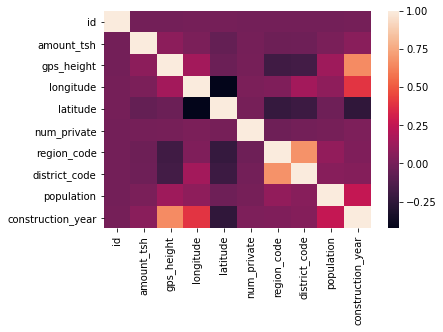

In [12]:
sns.heatmap(df.corr())

In [13]:
df.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


**Seems all good so far. Will check again later after manipulating and adding some features.**

## Pump Record Missing Data: Yes or No?

In [14]:
# print(len(df.dropna())) 
# print(len(df.apply(lambda x: x.replace('unknown', np.nan)).dropna()))
df = df.apply(lambda x: x.replace('unknown', np.nan))
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [15]:
complete_record_idx_list = df.dropna().index
complete_record_idx_list
df['complete_record'] = df['id'].map(lambda x: 'Yes' if x in complete_record_idx_list else 'No')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,complete_record
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,No
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,No
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,Yes
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,No
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Yes


In [16]:
df['complete_record'].value_counts()

No     39211
Yes    20189
Name: complete_record, dtype: int64

**Great, now lets replace all of our NaN values with 'unknown'.**

In [17]:
df = df.fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
r

## Date Conversion to Year & Month

**Here I am going to create a simple 'year_recorded' & 'month_recorded' feature to make visualizations easier to investigate.  If there exists any relationship with the status of the pumps compared with the year they were investigated or the time of year, then this should help to make that clearer.**

In [18]:
df['year_recorded'] = pd.to_datetime(df['date_recorded']).dt.year
# df['month_recorded'] = pd.to_datetime(df['date_recorded']).dt.month
df['year_recorded'] = df['year_recorded']
# df['month_recorded'] = df['month_recorded']
df = df.drop('date_recorded', axis=1)
print('Number of Years Recording:', df['year_recorded'].nunique())
# print('Number of Months Recorded in:', df['month_recorded'].nunique())
print('-------------------------------')
df.info()

Number of Years Recording: 5
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non

## Replace Construction Feature w/ Years Since & Add Known or Unknown

In [19]:
df['yrs_in_operation'] = -1 * (df['construction_year'] - df['year_recorded'])
df['yrs_in_operation'] = df['yrs_in_operation'].map(lambda x: 0 if x > 100 else x)
df = df[df['yrs_in_operation'] >= 0]
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,complete_record,year_recorded,yrs_in_operation
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,No,2011,12
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,unknown,GeoData Consultants Ltd,Other,unknown,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,No,2013,3
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,Yes,2013,4
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,unknown,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,No,2013,27
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,unknown,unknown,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Yes,2011,0


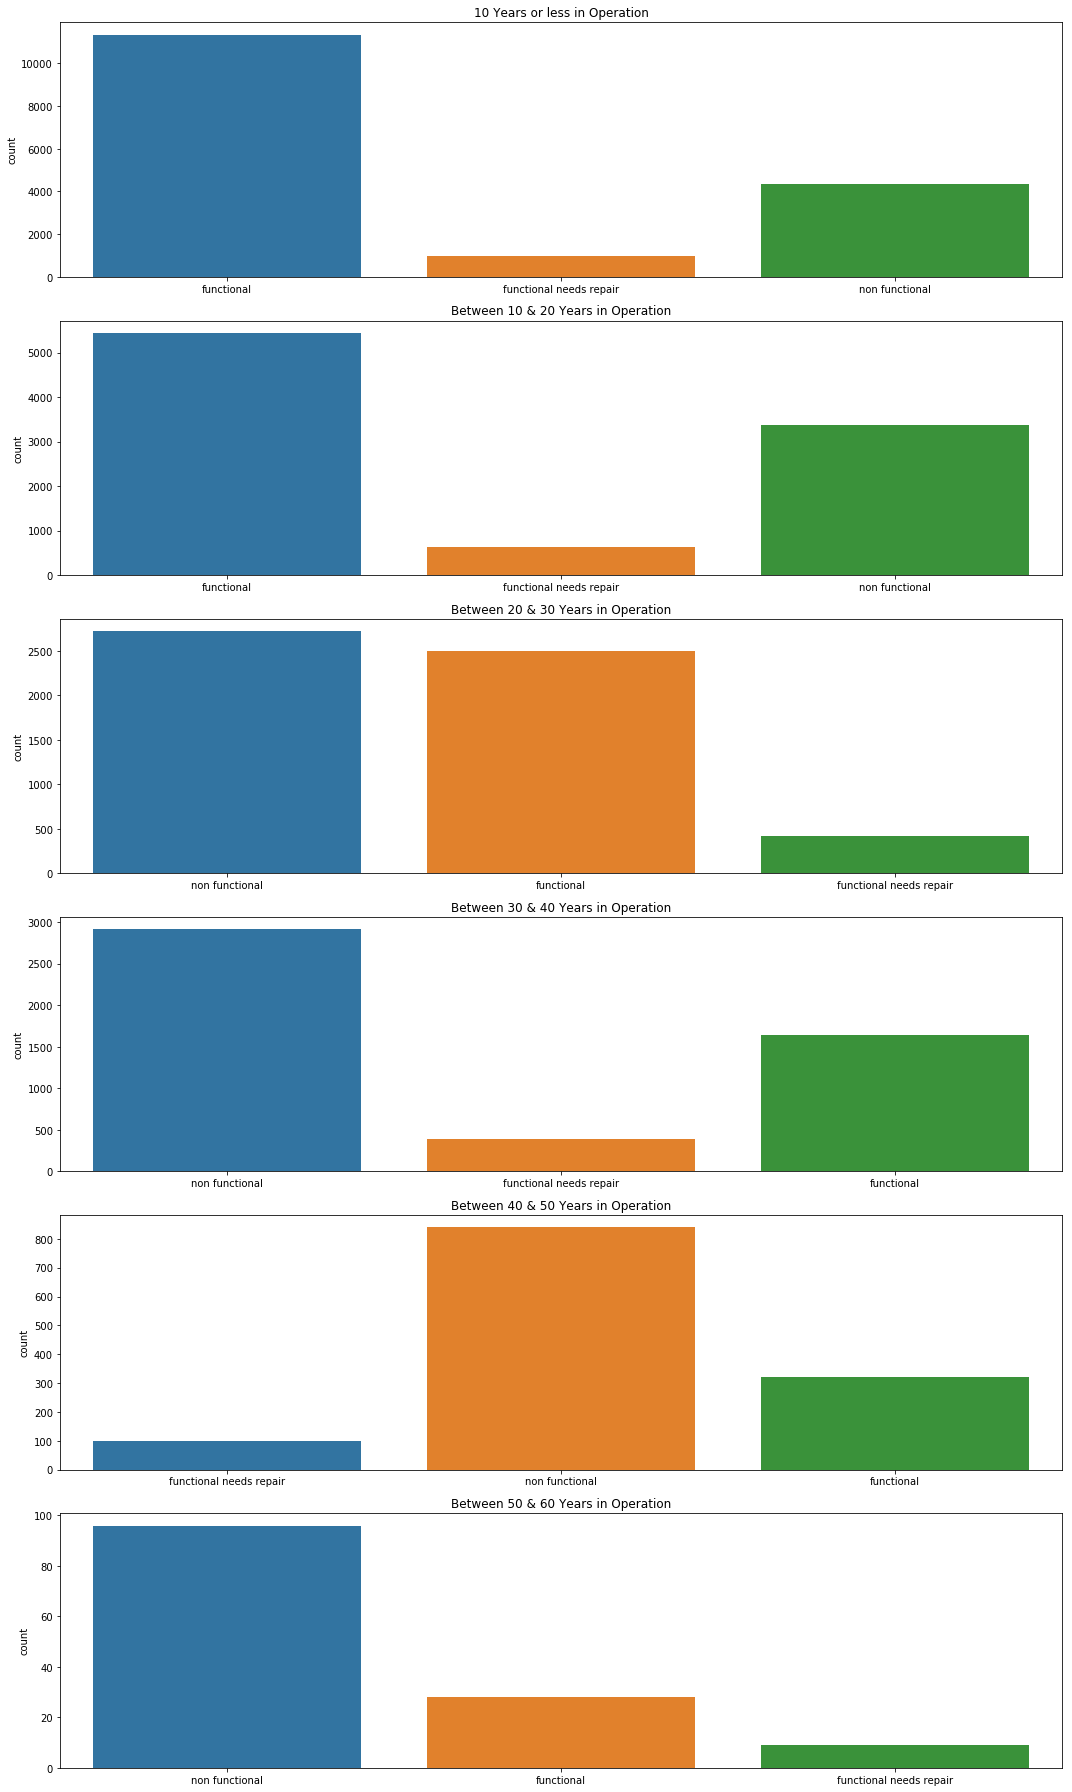

In [20]:
plt.figure(figsize=(15, 25))
years_in_operation_list = [10, 20, 30, 40, 50, 60]
n = 0
for years in years_in_operation_list:
    if n == 0:
        plot_num = ((len(years_in_operation_list))*100) + 10 + (n+1)
        ax = plt.subplot(plot_num)
        sns.countplot('status_group',
                      data=df[(df['yrs_in_operation'] <= years_in_operation_list[n]) &
                              (df['yrs_in_operation'] > 0)],
                      ax=ax)
        plt.title(f'{years} Years or less in Operation')
        plt.xlabel(None)
        plt.tight_layout();
    else:
        plot_num = ((len(years_in_operation_list))*100) + 10 + (n+1)
        ax = plt.subplot(plot_num)
        sns.countplot('status_group',
                      data=df[(df['yrs_in_operation'] <= years_in_operation_list[n]) &
                              (df['yrs_in_operation'] > years_in_operation_list[n - 1]) &
                              (df['yrs_in_operation'] > 0)],
                      ax=ax)
        plt.title(f'Between {years_in_operation_list[n-1]} & {years} Years in Operation')
        plt.xlabel(None)
        plt.tight_layout();
    
    n += 1

In [21]:
df['construction_yr_known'] = df['construction_year'].map(lambda x: 'No' if x == 0 else 'Yes')
df = df.drop(['construction_year', 'year_recorded'], axis=1)
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,complete_record,yrs_in_operation,construction_yr_known
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,No,12,Yes
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,unknown,GeoData Consultants Ltd,Other,unknown,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,No,3,Yes
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,Yes,4,Yes
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,unknown,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,No,27,Yes
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,unknown,unknown,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Yes,0,No


## Change Quality & Quantity to Binary Variables

In [22]:
df['water_quality'].value_counts()

soft                  50810
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         338
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [23]:
df['good_water'] = df['water_quality'].map(lambda x: 'Yes' if x == 'soft' else 'No')
df = df.drop('water_quality', axis=1)
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,complete_record,yrs_in_operation,construction_yr_known,good_water
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,No,12,Yes,Yes
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,unknown,GeoData Consultants Ltd,Other,unknown,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,No,3,Yes,Yes
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,Yes,4,Yes,Yes
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,unknown,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,No,27,Yes,Yes
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,unknown,unknown,True,gravity,gravity,gravity,other,other,never pay,never pay,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Yes,0,No,Yes


In [24]:
df['quantity'].value_counts(dropna=False)

enough          33181
insufficient    15129
dry              6243
seasonal         4049
unknown           789
Name: quantity, dtype: int64

In [25]:
df['enough_water'] = df['quantity'].map(lambda x: 'Yes' if x == 'enough' else 'No')
df = df.drop('quantity', axis=1)
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,quality_group,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,complete_record,yrs_in_operation,construction_yr_known,good_water,enough_water
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,No,12,Yes,Yes,Yes
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,unknown,GeoData Consultants Ltd,Other,unknown,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,No,3,Yes,Yes,No
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,Yes,4,Yes,Yes,Yes
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,unknown,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,No,27,Yes,Yes,No
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,unknown,unknown,True,gravity,gravity,gravity,other,other,never pay,never pay,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Yes,0,No,Yes,No


## Payment - Free or not?

In [26]:
df['payment'].value_counts()

never pay                25343
pay per bucket            8982
pay monthly               8300
unknown                   8157
pay when scheme fails     3913
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [27]:
df['payment'] = df['payment'].map(lambda x: 'Free' if x == 'never pay' else ('unknown' if x == 'unknown' else 'Yes'))
df = df.rename(columns={'payment':'payment_required'})
df['payment_required'].value_counts()

Yes        25891
Free       25343
unknown     8157
Name: payment_required, dtype: int64

## Interpolating Median GPS Height

In [28]:
df['district_code'].value_counts(dropna=False)

1     12203
2     11171
3      9998
4      8995
5      4356
6      4074
7      3343
8      1043
30      995
33      871
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [29]:
df.groupby('district_code')['gps_height'].describe()

,count,mean,std,min,25%,50%,75%,max
district_code,,,,,,,,
0,23.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
1,12203.0,678.767188,651.989542,-50.0,0.00,518.0,1301.50,2253.0
2,11171.0,853.425387,694.894383,-14.0,0.00,1019.0,1499.00,2222.0
3,9998.0,642.588918,696.644540,-63.0,0.00,306.0,1230.00,2568.0
4,8995.0,860.849583,773.859946,-55.0,0.00,905.0,1579.00,2385.0
5,4356.0,660.115243,681.734302,-90.0,0.00,698.0,1221.00,2770.0
6,4074.0,307.589347,486.336686,-46.0,0.00,0.0,400.75,2223.0
7,3343.0,727.915345,702.155630,0.0,0.00,1015.0,1369.00,2158.0
8,1043.0,30.663471,191.921296,0.0,0.00,0.0,0.00,1262.0


**Let's go ahead here and drop districts ) & 80 as they have no useful information for this feature and do not allow for this method to work.**

In [30]:
df = df[(df['district_code'] != 0) & (df['district_code'] != 80)]
df = df.reset_index(drop=True)
df.groupby('district_code')['gps_height'].describe()

,count,mean,std,min,25%,50%,75%,max
district_code,,,,,,,,
1,12203.0,678.767188,651.989542,-50.0,0.00,518.0,1301.50,2253.0
2,11171.0,853.425387,694.894383,-14.0,0.00,1019.0,1499.00,2222.0
3,9998.0,642.588918,696.644540,-63.0,0.00,306.0,1230.00,2568.0
4,8995.0,860.849583,773.859946,-55.0,0.00,905.0,1579.00,2385.0
5,4356.0,660.115243,681.734302,-90.0,0.00,698.0,1221.00,2770.0
6,4074.0,307.589347,486.336686,-46.0,0.00,0.0,400.75,2223.0
7,3343.0,727.915345,702.155630,0.0,0.00,1015.0,1369.00,2158.0
8,1043.0,30.663471,191.921296,0.0,0.00,0.0,0.00,1262.0
13,391.0,71.455243,116.374649,-51.0,-17.00,33.0,119.00,458.0


**Okay now let's get the median height for each district, using the values from the df without any 0's.**

In [31]:
df_district = df[df['gps_height'] != 0].groupby('district_code').agg(['mean', 'median'])
df_district

id            amount_tsh          gps_height          longitude              latitude            num_private        region_code         population        yrs_in_operation       
                       mean   median         mean median         mean  median       mean     median       mean     median        mean median        mean median        mean median             mean median
district_code                                                                                                                                                                                             
1              37154.732883  36994.0   620.530497    0.0   998.432498  1181.0  35.707068  36.061108  -5.636281  -5.544601    0.967695      0   15.081847     11  246.787006  148.0        14.261451     11
2              36608.746428  36165.0   608.900218    0.0  1154.470211  1325.0  35.236338  35.345579  -5.477856  -4.714161    0.472148      0   10.307217     11  307.468879  200.0        15.747033     13
3              37645.783458  38427.0   346.528399    0.0   980.406531   982.0  35.229582  35.107623  -6.774769  -6.933542    0.262780      0    9.985045     10  275.711888  165.0        15.265527     13
4              36887.691078  36939.0   620.280745    5.0  1262.981895  1403.0  35.792096  35.047597  -6.987447  -8.816343    0.051704      0    9.719458     11  194.707062   65.0        16.051704     11
5              37010.701009  36420.0   397.801153    7.0  1035.829251  1036.5  36.572013  36.281264  -7.219150  -6.905032    1.045389      0    7.951009     10  247.720821  120.0        13.659582     14
6              37319.608589  37477.0   116.098160    0.0   768.784663   550.0  37.001327  37.442629  -4.610371  -5.552744    5.677301      0    6.430675      5  314.577914  120.0        15.476687     11
7              37401.093192  37670.5   421.018415    0.0  1357.935826  1348.0  36.748784  36.896285  -4.174730  -3.334761    0.004464      0    3.994978      2  153.686384  120.0        11.883929      8
8              38169.653846  43132.0   809.615385    0.0  1230.076923  1239.5  32.977866  32.986150  -2.497340  -2.494449    0.000000      0   19.000000     19  860.769231  600.0        18.846154     21
13             36686.813299  35369.0    21.368286    0.0    71.455243    33.0  39.186059  39.185480  -8.774497  -8.595746    0.000000      0   80.000000     80  334.158568  300.0        16.043478     12
23             38452.369863  41315.5    55.770548   20.0   135.791096    91.5  39.481742  39.449088 -10.089183 -10.152946    0.000000      0   80.000000     80  203.150685   40.0         9.791096      4
30             38790.871166  40259.5   288.389571   10.0  1472.082822  1505.5  35.661985  35.671781  -3.380886  -3.355989    0.000000      0   24.000000     24  422.110429  200.0        10.788344     11
33             36588.508611  36454.0    57.492537    0.0   374.591274   349.0  39.033296  39.046825 -10.297209 -10.730228    0.520092      0   86.107922     90  234.343284    1.0        18.633754     18
43             35825.093439  35745.0    24.234592    0.0   167.371769    61.0  38.835371  39.124269  -7.943826  -7.190621    0.085487      0   66.083499     60  882.093439  350.0         9.821074      5
53             36652.200542  36794.5    28.299458    0.0   141.569106   114.5  38.918505  38.958955  -8.750416  -7.988308    0.173442      0   67.886179     60  288.390244    1.0        16.031165      8
60             37049.936508  34662.0  2303.968254    0.0   -18.444444   -18.0  39.678166  39.666581  -7.924318  -7.911877    0.000000      0   60.000000     60  163.126984   35.0         0.000000      0
62             39171.858491  38713.5    10.283019    0.0    24.603774    15.0  39.604048  39.591943 -10.000212 -10.024645    0.000000      0   80.000000     80  447.367925  375.0        14.801887     13
63             36263.748718  35708.0    17.000000    0.0   249.276923   310.0  38.706993  38.507951 -10.426976 -10.926359    0.000000      0   84.307692     90  132.712

In [32]:
median_height_district_list = df_district['gps_height']['median']
median_height_district_list

district_code
1     1181.0
2     1325.0
3      982.0
4     1403.0
5     1036.5
6      550.0
7     1348.0
8     1239.5
13      33.0
23      91.5
30    1505.5
33     349.0
43      61.0
53     114.5
60     -18.0
62      15.0
63     310.0
67     -26.0
Name: median, dtype: float64

In [33]:
missing_gps_idx_list = df[df['gps_height'] == 0].index
missing_gps_idx_list

Int64Index([    4,     5,     6,     7,     8,     9,    12,    14,    21,    27,
            ...
            59328, 59330, 59333, 59335, 59337, 59340, 59348, 59349, 59353, 59354], dtype='int64', length=20403)

In [34]:
for idx in missing_gps_idx_list:
#     print(idx)
    loc = df.iloc[idx]['district_code']
    new_num = median_height_district_list[loc]
    df.iloc[idx, df.columns.get_loc('gps_height')] = new_num
#     print(df.iloc[idx, df.columns.get_loc('gps_height')])

In [35]:
df['gps_height'].describe()

count    59356.000000
mean      1059.831710
std        523.121938
min        -90.000000
25%        673.000000
50%       1181.000000
75%       1403.000000
max       2770.000000
Name: gps_height, dtype: float64

## Management Group Binary  Change

In [36]:
df['management_group'].value_counts()

user-group    52458
commercial     3636
parastatal     1763
other           938
unknown         561
Name: management_group, dtype: int64

In [37]:
df['management'].value_counts()

vwc                 40480
wug                  6510
water board          2933
wua                  2535
private operator     1969
parastatal           1763
water authority       904
other                 839
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

**Ok, so we will drop Management as the categories can likely fit nicely within Management_group**

In [38]:
df['management_group'] = df['management_group'].map(lambda x: 'other' if x == 'unknown' else x)
df = df.drop('management', axis=1)
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management_group,payment_required,payment_type,quality_group,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,complete_record,yrs_in_operation,construction_yr_known,good_water,enough_water
0,69572,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,user-group,Yes,annually,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,No,12,Yes,Yes,Yes
1,8776,0.0,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,unknown,GeoData Consultants Ltd,Other,unknown,True,gravity,gravity,gravity,user-group,Free,never pay,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,No,3,Yes,Yes,No
2,34310,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,user-group,Yes,per bucket,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,Yes,4,Yes,Yes,Yes
3,67743,0.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,unknown,True,submersible,submersible,submersible,user-group,Free,never pay,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,No,27,Yes,Yes,No
4,19728,0.0,Action In A,1181.0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,unknown,unknown,True,gravity,gravity,gravity,other,Free,never pay,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Yes,0,No,Yes,No


## Replace Funder/Installer with Relative Experience

In [39]:
# df['funder'].value_counts()

In [40]:
# df['funder_exp'] = df['funder'].map(lambda x: df['funder'].value_counts()[x])
# df.head()

In [41]:
# funder_exp_list = df['funder'].value_counts()


In [42]:
# for i in df.funder.value_counts().index[:5]:
#     df[i.replace(" ", "_")] = (df.funder == i).astype(int)

In [43]:
# df.head()

In [44]:
# df['extraction_type_class'].unique()

In [45]:
# plt.figure(figsize=(15,10))
# sns.set_style('darkgrid')
# sns.scatterplot(x='longitude',
#                 y='latitude',
#                 data=df[(df['construction_year'] == 0) &
#                         (df['latitude'] < -2.000000e-08)],
#                 hue='status_group')

In [46]:
# no_const_df = df[df['construction_year'] == 0]

# def construction_year_mystery_comparison(base_feature, secondary_feature):
    
#     print('Construction Year Unknown Distribution for {}:\n'.format(base_feature),
#       no_const_df[base_feature].value_counts(normalize=True))
#     print('------------------------------------------------------')
#     print('Construction Year Known Distribution for {}:\n'.format(base_feature),
#       df[df['construction_year'] != 0][base_feature].value_counts(normalize=True))
    
#     if secondary_feature:
#         print('Construction Year Unknown Distribution for {}:\n'.format(secondary_feature),
#           no_const_df[secondary_feature].value_counts(normalize=True))
#         print('------------------------------------------------------')
#         print('Construction Year Known Distribution for {}:\n'.format(secondary_feature),
#           df[df['construction_year'] != 0][secondary_feature].value_counts(normalize=True))
    
#     plt.figure(figsize=(15,6))

#     ax1 = plt.subplot(121)
#     sns.countplot(x=base_feature, data=no_const_df, ax=ax1, hue=secondary_feature,)
#     plt.title('Construction Year Unknown Distribution')
#     plt.legend()
#     plt.ylabel(base_feature)
#     plt.xlabel(secondary_feature)

#     ax2 = plt.subplot(122)
#     sns.countplot(x=base_feature, data=df[df['construction_year'] != 0], ax=ax2, hue=secondary_feature)
#     plt.title('Construction Year known Distribution')
#     plt.ylabel(base_feature)
#     plt.xlabel(secondary_feature)
#     plt.tight_layout();

In [47]:
# construction_mystery_hue_sec_features = [None,
#                                      'source_class',
#                                      'water_quality',
#                                      'quantity',
#                                      'waterpoint_type_group',
#                                      'payment',
#                                      'permit']

# for feature in construction_mystery_hue_sec_features:
#     construction_year_mystery_comparison('status_group', feature)
#     print('------------------------------------------------------')

    

**These features to be dropped did not seem to provide any additional information for analysis. They were either objectively uninformative, or redundant and provided less information than another feature already in the dataset.**

In [48]:
df = df.drop(['wpt_name',
                      'num_private',
                      'subvillage',
                      'recorded_by',
                      'scheme_name',
                      'extraction_type_group',
                      'extraction_type_group',
                      'payment_type',
                      'quality_group',
                      'quantity_group',
                      'source',
                      'waterpoint_type_group',
                      'ward',
                      'region_code',
                      'district_code',
                      'lga',
                      'id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59356 entries, 0 to 59355
Data columns (total 25 columns):
amount_tsh               59356 non-null float64
funder                   59356 non-null object
gps_height               59356 non-null float64
installer                59356 non-null object
longitude                59356 non-null float64
latitude                 59356 non-null float64
basin                    59356 non-null object
region                   59356 non-null object
population               59356 non-null int64
public_meeting           59356 non-null object
scheme_management        59356 non-null object
permit                   59356 non-null object
extraction_type          59356 non-null object
extraction_type_class    59356 non-null object
management_group         59356 non-null object
payment_required         59356 non-null object
source_type              59356 non-null object
source_class             59356 non-null object
waterpoint_type          59356 non-null ob

# Feature Cleaning

**Features that need to be cleaned**

1. date_recorded - replace with year/month_recorded for easier data exploration/categorization
2. funder - Choose top 10
3. Installer - Clean 0's and choose top 10
5. construction_year - Missing 34% of data, replace 0's with 'Other' and create decade bins
6. public_meeting ~3.4k
7. scheme_management ~4k
8. permit ~3k

## Top 10 Funders - Complete

**I suspect that there is value in knowing who funded the construction of each water pump.  Therefore, I will choose the top 5 funders and create dummy features for them, afterwards dropping the original feature.** 

In [49]:
df['funder'].value_counts().head(10)

Government Of Tanzania    9083
unknown                   3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1338
Kkkt                      1286
World Vision              1246
Unicef                    1057
Tasaf                      877
Name: funder, dtype: int64

In [50]:
for i in df.funder.value_counts().index[:10]:
        df['{}_fund'.format(i.replace(" ", "_"))] = (df.funder == i).astype(int)
df = df.drop('funder', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59356 entries, 0 to 59355
Data columns (total 34 columns):
amount_tsh                     59356 non-null float64
gps_height                     59356 non-null float64
installer                      59356 non-null object
longitude                      59356 non-null float64
latitude                       59356 non-null float64
basin                          59356 non-null object
region                         59356 non-null object
population                     59356 non-null int64
public_meeting                 59356 non-null object
scheme_management              59356 non-null object
permit                         59356 non-null object
extraction_type                59356 non-null object
extraction_type_class          59356 non-null object
management_group               59356 non-null object
payment_required               59356 non-null object
source_type                    59356 non-null object
source_class                   59356 non

## Top 5 Installers - Complete

**I also suspect that there is value in knowing who installed each water pump.  Therefore, I will choose the top 5 installers and create dummy features for them, afterwards dropping the original feature.** 

In [51]:
df['installer'].value_counts().head(10)

DWE           17398
unknown        3656
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
KKKT            898
Hesawa          840
0               777
TCRS            707
Name: installer, dtype: int64

In [52]:
df['installer'] = df['installer'].replace('0', 'Other')

In [53]:
for i in df.installer.value_counts().index[:10]:
        df['{}_install'.format(i.replace(" ", "_"))] = (df.installer == i).astype(int)
df = df.drop('installer', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59356 entries, 0 to 59355
Data columns (total 43 columns):
amount_tsh                     59356 non-null float64
gps_height                     59356 non-null float64
longitude                      59356 non-null float64
latitude                       59356 non-null float64
basin                          59356 non-null object
region                         59356 non-null object
population                     59356 non-null int64
public_meeting                 59356 non-null object
scheme_management              59356 non-null object
permit                         59356 non-null object
extraction_type                59356 non-null object
extraction_type_class          59356 non-null object
management_group               59356 non-null object
payment_required               59356 non-null object
source_type                    59356 non-null object
source_class                   59356 non-null object
waterpoint_type                59356 non

## Public Meeting - Replace Missing Values

In [54]:
df['public_meeting'].value_counts(dropna=False)

True       50974
False       5051
unknown     3331
Name: public_meeting, dtype: int64

In [55]:
df['public_meeting'] = df['public_meeting'].fillna('Other')
df['public_meeting'].value_counts(dropna=False)

True       50974
False       5051
unknown     3331
Name: public_meeting, dtype: int64

## Permit - Replace Missing Values

In [56]:
df['permit'].value_counts(dropna=False)

True       38821
False      17479
unknown     3056
Name: permit, dtype: int64

In [57]:
df['permit'] = df['permit'].fillna('Other')
df['permit'].value_counts(dropna=False)

True       38821
False      17479
unknown     3056
Name: permit, dtype: int64

## Scheme Management - Replace Missing Values

In [58]:
df['scheme_management'].value_counts(dropna=False)

VWC                 36763
WUG                  5201
unknown              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1675
Private operator     1062
Company              1061
Other                 763
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

**This is a little ambiguous, let's assume that NaN is not other, since there is an Other category already, instead let's group the NaN up with the None value**

In [59]:
df['scheme_management'] = df['scheme_management'].fillna('None').replace('None', 'Unknown')
df['scheme_management'].value_counts(dropna=False)

VWC                 36763
WUG                  5201
unknown              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1675
Private operator     1062
Company              1061
Other                 763
SWC                    97
Trust                  72
Unknown                 1
Name: scheme_management, dtype: int64

# Create Dummies

In [60]:
df.head()

,amount_tsh,gps_height,longitude,latitude,basin,region,population,public_meeting,scheme_management,permit,extraction_type,extraction_type_class,management_group,payment_required,source_type,source_class,waterpoint_type,status_group,complete_record,yrs_in_operation,construction_yr_known,good_water,enough_water,Government_Of_Tanzania_fund,unknown_fund,Danida_fund,Hesawa_fund,Rwssp_fund,World_Bank_fund,Kkkt_fund,World_Vision_fund,Unicef_fund,Tasaf_fund,DWE_install,unknown_install,Government_install,RWE_install,Commu_install,DANIDA_install,KKKT_install,Hesawa_install,Other_install,TCRS_install
0,6000.0,1390.0,34.938093,-9.856322,Lake Nyasa,Iringa,109,True,VWC,False,gravity,gravity,user-group,Yes,spring,groundwater,communal standpipe,functional,No,12,Yes,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,1399.0,34.698766,-2.147466,Lake Victoria,Mara,280,unknown,Other,True,gravity,gravity,user-group,Free,rainwater harvesting,surface,communal standpipe,functional,No,3,Yes,Yes,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,25.0,686.0,37.460664,-3.821329,Pangani,Manyara,250,True,VWC,True,gravity,gravity,user-group,Yes,dam,surface,communal standpipe multiple,functional,Yes,4,Yes,Yes,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,263.0,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,True,VWC,True,submersible,submersible,user-group,Free,borehole,groundwater,communal standpipe multiple,non functional,No,27,Yes,Yes,No,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.0,1181.0,31.130847,-1.825359,Lake Victoria,Kagera,0,True,unknown,True,gravity,gravity,other,Free,rainwater harvesting,surface,communal standpipe,functional,Yes,0,No,Yes,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
basin_dummies = pd.get_dummies(df['basin'], prefix='basin')
region_dummies = pd.get_dummies(df['region'], prefix='region')
public_meeting_dummies = pd.get_dummies(df['public_meeting'], prefix='pub_meet')
scheme_dummies = pd.get_dummies(df['scheme_management'], prefix='scheme')
permit_dummies = pd.get_dummies(df['permit'], prefix='permit')
extraction_type_dummies = pd.get_dummies(df['extraction_type'], prefix='ex_type')
# extraction_class_dummies = pd.get_dummies(df['extraction_type_class'], prefix='ex_class')
management_group_dummies = pd.get_dummies(df['management_group'], prefix='mgmt_grp')
payment_dummies = pd.get_dummies(df['payment_required'], prefix='pymt')
water_quality_dummies = pd.get_dummies(df['good_water'], prefix='wtr_qlty')
quantity_dummies = pd.get_dummies(df['enough_water'], prefix='quant')
source_dummies = pd.get_dummies(df['source_type'], prefix='src')
source_class_dummies = pd.get_dummies(df['source_class'], prefix='src_cls')
waterpoint_type_dummies = pd.get_dummies(df['waterpoint_type'], prefix='wtrpt_typ')
construction_dummies = pd.get_dummies(df['construction_yr_known'], prefix='const')
complete_reord_dummies = pd.get_dummies(df['complete_record'], prefix='record')

df_model = pd.concat([df.drop(['basin',
                               'region',
                               'public_meeting',
                               'scheme_management',
                               'permit',
                               'extraction_type',
                               'extraction_type_class',
                               'management_group',
                               'payment_required',
                               'good_water',
                               'enough_water',
                               'source_type',
                               'source_class',
                               'waterpoint_type',
                               'construction_yr_known',
                               'complete_record'], axis=1),
                      basin_dummies,
                      region_dummies,
                      scheme_dummies,
                      permit_dummies,
                      extraction_type_dummies,
#                       extraction_class_dummies,
                      management_group_dummies,
                      payment_dummies,
                      water_quality_dummies,
                      quantity_dummies,
                      source_dummies,
                      source_class_dummies,
                      waterpoint_type_dummies,
                      construction_dummies], axis=1)
df_model.head()

,amount_tsh,gps_height,longitude,latitude,population,status_group,yrs_in_operation,Government_Of_Tanzania_fund,unknown_fund,Danida_fund,Hesawa_fund,Rwssp_fund,World_Bank_fund,Kkkt_fund,World_Vision_fund,Unicef_fund,Tasaf_fund,DWE_install,unknown_install,Government_install,RWE_install,Commu_install,DANIDA_install,KKKT_install,Hesawa_install,Other_install,TCRS_install,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,scheme_Company,scheme_Other,scheme_Parastatal,scheme_Private operator,scheme_SWC,scheme_Trust,scheme_Unknown,scheme_VWC,scheme_WUA,scheme_WUG,scheme_Water Board,scheme_Water authority,scheme_unknown,permit_False,permit_True,permit_unknown,ex_type_afridev,ex_type_cemo,ex_type_climax,ex_type_gravity,ex_type_india mark ii,ex_type_india mark iii,ex_type_ksb,ex_type_mono,ex_type_nira/tanira,ex_type_other,ex_type_other - mkulima/shinyanga,ex_type_other - play pump,ex_type_other - rope pump,ex_type_other - swn 81,ex_type_submersible,ex_type_swn 80,ex_type_walimi,ex_type_windmill,mgmt_grp_commercial,mgmt_grp_other,mgmt_grp_parastatal,mgmt_grp_user-group,pymt_Free,pymt_Yes,pymt_unknown,wtr_qlty_No,wtr_qlty_Yes,quant_No,quant_Yes,src_borehole,src_dam,src_other,src_rainwater harvesting,src_river/lake,src_shallow well,src_spring,src_cls_groundwater,src_cls_surface,src_cls_unknown,wtrpt_typ_cattle trough,wtrpt_typ_communal standpipe,wtrpt_typ_communal standpipe multiple,wtrpt_typ_dam,wtrpt_typ_hand pump,wtrpt_typ_improved spring,wtrpt_typ_other,const_No,const_Yes
0,6000.0,1390.0,34.938093,-9.856322,109,functional,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1
1,0.0,1399.0,34.698766,-2.147466,280,functional,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,25.0,686.0,37.460664,-3.821329,250,functional,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,0.0,263.0,38.486161,-11.155298,58,non functional,27,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,0.0,1181.0,31.130847,-1.825359,0,functional,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [62]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59356 entries, 0 to 59355
Columns: 121 entries, amount_tsh to const_Yes
dtypes: float64(4), int32(20), int64(2), object(1), uint8(94)
memory usage: 13.0+ MB


# Modeling

## Train Test Split

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
import pydotplus
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [65]:
y = df_model['status_group']
X = df_model.drop('status_group', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Scale Data - Standard Scaler

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
test_df_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
test_df_scaled.head()

,amount_tsh,gps_height,longitude,latitude,population,yrs_in_operation,Government_Of_Tanzania_fund,unknown_fund,Danida_fund,Hesawa_fund,Rwssp_fund,World_Bank_fund,Kkkt_fund,World_Vision_fund,Unicef_fund,Tasaf_fund,DWE_install,unknown_install,Government_install,RWE_install,Commu_install,DANIDA_install,KKKT_install,Hesawa_install,Other_install,TCRS_install,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,scheme_Company,scheme_Other,scheme_Parastatal,scheme_Private operator,scheme_SWC,scheme_Trust,scheme_Unknown,scheme_VWC,scheme_WUA,scheme_WUG,scheme_Water Board,scheme_Water authority,scheme_unknown,permit_False,permit_True,permit_unknown,ex_type_afridev,ex_type_cemo,ex_type_climax,ex_type_gravity,ex_type_india mark ii,ex_type_india mark iii,ex_type_ksb,ex_type_mono,ex_type_nira/tanira,ex_type_other,ex_type_other - mkulima/shinyanga,ex_type_other - play pump,ex_type_other - rope pump,ex_type_other - swn 81,ex_type_submersible,ex_type_swn 80,ex_type_walimi,ex_type_windmill,mgmt_grp_commercial,mgmt_grp_other,mgmt_grp_parastatal,mgmt_grp_user-group,pymt_Free,pymt_Yes,pymt_unknown,wtr_qlty_No,wtr_qlty_Yes,quant_No,quant_Yes,src_borehole,src_dam,src_other,src_rainwater harvesting,src_river/lake,src_shallow well,src_spring,src_cls_groundwater,src_cls_surface,src_cls_unknown,wtrpt_typ_cattle trough,wtrpt_typ_communal standpipe,wtrpt_typ_communal standpipe multiple,wtrpt_typ_dam,wtrpt_typ_hand pump,wtrpt_typ_improved spring,wtrpt_typ_other,const_No,const_Yes
0,0.031397,1.731886,0.273747,-0.856281,-0.061336,-0.165026,-0.42652,-0.2557,-0.235224,-0.19613,-0.150969,-0.150345,-0.147826,-0.148063,-0.134499,-0.120773,-0.644302,-0.256347,-0.178392,-0.144458,-0.135534,-0.131966,-0.122863,-0.119426,-0.11649,-0.109873,-0.387008,-0.304835,-0.206342,-0.349587,-0.456567,-0.423573,2.545701,-0.285955,-0.335339,-0.246551,-0.118552,-0.196006,3.206040,-0.243305,-0.223282,-0.282863,-0.163424,-0.167011,-0.185831,-0.289479,-0.268331,-0.174192,-0.235064,-0.216148,-0.177788,-0.214377,-0.301035,-0.190945,-0.183162,-0.211843,-0.134585,-0.115095,-0.170112,-0.135706,-0.038824,-0.035806,-0.00474,0.781223,-0.226918,-0.308779,-0.220272,-0.235915,-0.261729,-0.645978,0.727942,-0.234052,-0.175012,-0.039685,-0.025087,1.103019,-0.204501,-0.039685,-0.158354,-0.22472,-0.398136,-0.346016,-0.00474,-0.037042,-0.089148,-0.063894,-0.298498,-0.255101,-0.027237,-0.044251,-0.256944,-0.160207,-0.174466,0.363119,-0.860093,1.132972,-0.39825,-0.411069,0.411069,-0.887316,0.887316,-0.502477,-0.105823,-0.068845,-0.198587,2.177762,-0.626572,-0.636978,-1.840789,1.865818,-0.068845,-0.044251,1.039203,-0.340168,-0.00948,-0.644127,-0.115894,-0.346098,-0.729061,0.729061
1,-0.104247,1.296521,0.139885,-1.157298,-0.125332,-0.004873,-0.42652,-0.2557,-0.235224,-0.19613,-0.150969,-0.150345,-0.147826,-0.148063,-0.134499,-0.120773,1.552067,-0.256347,-0.178392,-0.144458,-0.135534,-0.131966,-0.122863,-0.119426,-0.11649,-0.109873,-0.387008,-0.304835,-0.206342,-0.349587,-0.456567,-0.423573,2.545701,-0.285955,-0.335339,-0.246551,-0.118552,-0.196006,3.206040,-0.243305,-0.223282,-0.282863,-0.163424,-0.167011,-0.185831,-0.289479,-0.268331,-0.174192,-0.235064,-0.216148,-0.177788,-0.214377,-0.301035,-0.190945,-0.183162,-0.211843,-0.134585,-0.115095,-0.170112,-0.135706,-0.038824,-0.035806,-0.00474,0.781223,-0.226918,-0.308779,-0.220272,-0.235915,-0.261729,1.548040,-1.373737,-0.234052,-0.175012,-0.039685,-0.025087,1.103019,-0.204501,-0.039685,-0.158354,-0.22472,-0.398136,-0.346016,-0.00474,-0.037042,-0.089148,-0.063894,-0.298498,-0.255101,-0.027237,-0.044251,-0.256944,-0.160207,-0.174466,0.363119,1.16

## Initial Decision Tree Classifier Model

In [76]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train_scaled, y_train)
dec_tree.score(X_train_scaled, y_train)

0.9958442842060337

In [485]:
dec_tree.score(X_test_scaled, y_test)

0.7338095558999933

In [486]:
y_preds = dec_tree.predict(X_test_scaled)

[[6289  473 1273]
 [ 473  402  222]
 [1297  212 4198]]


<Figure size 864x504 with 0 Axes>

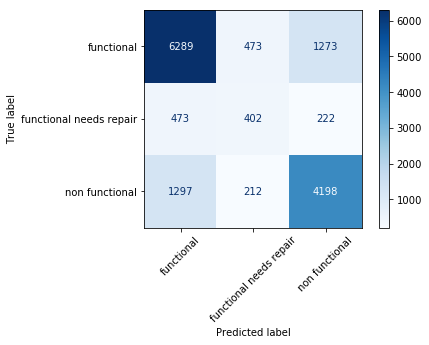

In [487]:
print(confusion_matrix(y_test, y_preds))
plt.figure(figsize=(12, 7));
plot_confusion_matrix(dec_tree, X_test_scaled, y_test, cmap=plt.cm.Blues);
plt.xticks(rotation=45);

In [488]:
print(classification_report(y_test, y_preds))

                         precision    recall  f1-score   support

             functional       0.78      0.78      0.78      8035
functional needs repair       0.37      0.37      0.37      1097
         non functional       0.74      0.74      0.74      5707

               accuracy                           0.73     14839
              macro avg       0.63      0.63      0.63     14839
           weighted avg       0.73      0.73      0.73     14839



In [443]:
# dot_data = export_graphviz(dec_tree, out_file=None,
#                           feature_names=X.columns,
#                           class_names = np.unique(y).astype('str'),
#                           filled=True, rounded=True, special_characters=True)

# graph = graph_from_dot_data(dot_data)

# Image(graph.create_png())

In [444]:
# plt.figure(figsize=(12,12), dpi=500)
# tree.plot_tree(dec_tree, 
#                feature_names=X.columns,
#                class_names=np.unique(y).astype('str'),
#                filled=True, rounded=True)
# plt.show()

## Initial Random Forest Classifier Model

In [491]:
rdm_forest = RandomForestClassifier(class_weight='balanced', random_state=42)

In [492]:
rdm_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [493]:
rdm_forest.score(X_train_scaled, y_train)

0.9940247545881349

In [494]:
rdm_forest.score(X_test_scaled, y_test)

0.7812521059370577

In [495]:
y_preds = rdm_forest.predict(X_test_scaled)

[[6869  295  871]
 [ 507  394  196]
 [1261  116 4330]]


<Figure size 864x504 with 0 Axes>

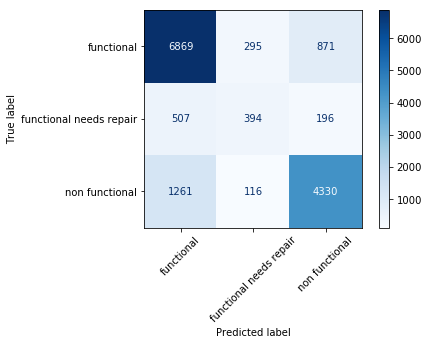

In [496]:
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, y_preds))
plt.figure(figsize=(12, 7));
plot_confusion_matrix(rdm_forest, X_test_scaled, y_test, cmap=plt.cm.Blues);
plt.xticks(rotation=45);

In [497]:
print(classification_report(y_test, y_preds))

                         precision    recall  f1-score   support

             functional       0.80      0.85      0.82      8035
functional needs repair       0.49      0.36      0.41      1097
         non functional       0.80      0.76      0.78      5707

               accuracy                           0.78     14839
              macro avg       0.70      0.66      0.67     14839
           weighted avg       0.78      0.78      0.78     14839



### Random Forest - GridSearchCV

In [505]:
# rf_grid_clf = RandomForestClassifier()
# grid_param = [{'criterion': ['gini'],
#                'max_depth': [20, 25],
#                'min_samples_split': [5, 10],
#                'min_samples_leaf': [2, 3, 4]}]

In [506]:
# rf_gridsearch = GridSearchCV(rf_grid_clf, grid_param, cv=3)
# rf_gridsearch.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini'], 'max_depth': [20, 25],
                          'min_samples_leaf': [2, 3, 4],
                          'min_samples_split': [5, 10]}])

In [507]:
# rf_gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [508]:
# rf_gridsearch.score(X_test_scaled, y_test)

0.7844868252577667

#### Random Forest 2.0

In [515]:
# rf_grid_clf_best1 = RandomForestClassifier(class_weight='balanced', n_estimators=200, max_depth=25, min_samples_leaf=2, min_samples_split=5, random_state=42)
# rf_grid_clf_best1.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=25,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [516]:
# rf_grid_clf_best1.score(X_train_scaled, y_train)

0.872363366803693

In [517]:
# rf_grid_clf_best1.score(X_test_scaled, y_test)

0.7658197991778422

In [518]:
# y_preds = rf_grid_clf_best1.predict(X_test_scaled)

In [63]:
# from sklearn.metrics import plot_confusion_matrix
# print(confusion_matrix(y_test, y_preds))
# plt.figure(figsize=(12, 10));
# plot_confusion_matrix(rf_grid_clf_best1, X_test_scaled, y_test, cmap=plt.cm.Blues);
# plt.xticks(rotation=45);

NameError: name 'y_test' is not defined

In [520]:
print(classification_report(y_test, y_preds))

                         precision    recall  f1-score   support

             functional       0.82      0.79      0.80      8035
functional needs repair       0.39      0.59      0.47      1097
         non functional       0.80      0.77      0.78      5707

               accuracy                           0.77     14839
              macro avg       0.67      0.72      0.69     14839
           weighted avg       0.78      0.77      0.77     14839



In [310]:
#n_e 200, min leaf 10, min split 50

                         precision    recall  f1-score   support

             functional       0.81      0.87      0.84      8098
functional needs repair       0.51      0.37      0.43      1074
         non functional       0.83      0.78      0.80      5678

               accuracy                           0.80     14850
              macro avg       0.72      0.67      0.69     14850
           weighted avg       0.80      0.80      0.80     14850



## SMOTE & Under Sampling

### SMOTE - Sampling Strategy 'AUTO'

In [531]:
y.value_counts()

functional                 32248
non functional             22794
functional needs repair     4314
Name: status_group, dtype: int64

In [68]:
from imblearn.over_sampling import SMOTE

print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_scaled, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

functional                 32248
non functional             22794
functional needs repair     4314
Name: status_group, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

functional needs repair    24213
non functional             24213
functional                 24213
Name: status_group, dtype: int64


In [69]:
rdm_forest_smote = RandomForestClassifier(class_weight='balanced',
                                          n_estimators=200,
                                          max_depth=25,
                                          min_samples_leaf=2,
                                          min_samples_split=5,
                                          random_state=42)

In [70]:
rdm_forest_smote.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=25,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [71]:
rdm_forest_smote.score(X_train_resampled, y_train_resampled)

0.9068406778727681

In [72]:
rdm_forest_smote.score(X_test_scaled, y_test)

0.7646741694184245

In [73]:
y_preds = rdm_forest_smote.predict(X_test_scaled)

[[6371  740  924]
 [ 331  614  152]
 [1100  245 4362]]


<Figure size 864x504 with 0 Axes>

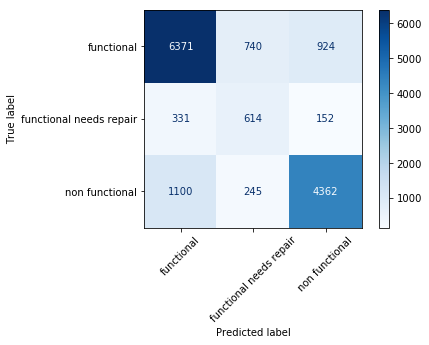

In [74]:
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, y_preds))
plt.figure(figsize=(12, 7));
plot_confusion_matrix(rdm_forest_smote, X_test_scaled, y_test, cmap=plt.cm.Blues);
plt.xticks(rotation=45);

In [75]:
print(classification_report(y_test, y_preds))

                         precision    recall  f1-score   support

             functional       0.82      0.79      0.80      8035
functional needs repair       0.38      0.56      0.46      1097
         non functional       0.80      0.76      0.78      5707

               accuracy                           0.76     14839
              macro avg       0.67      0.71      0.68     14839
           weighted avg       0.78      0.76      0.77     14839



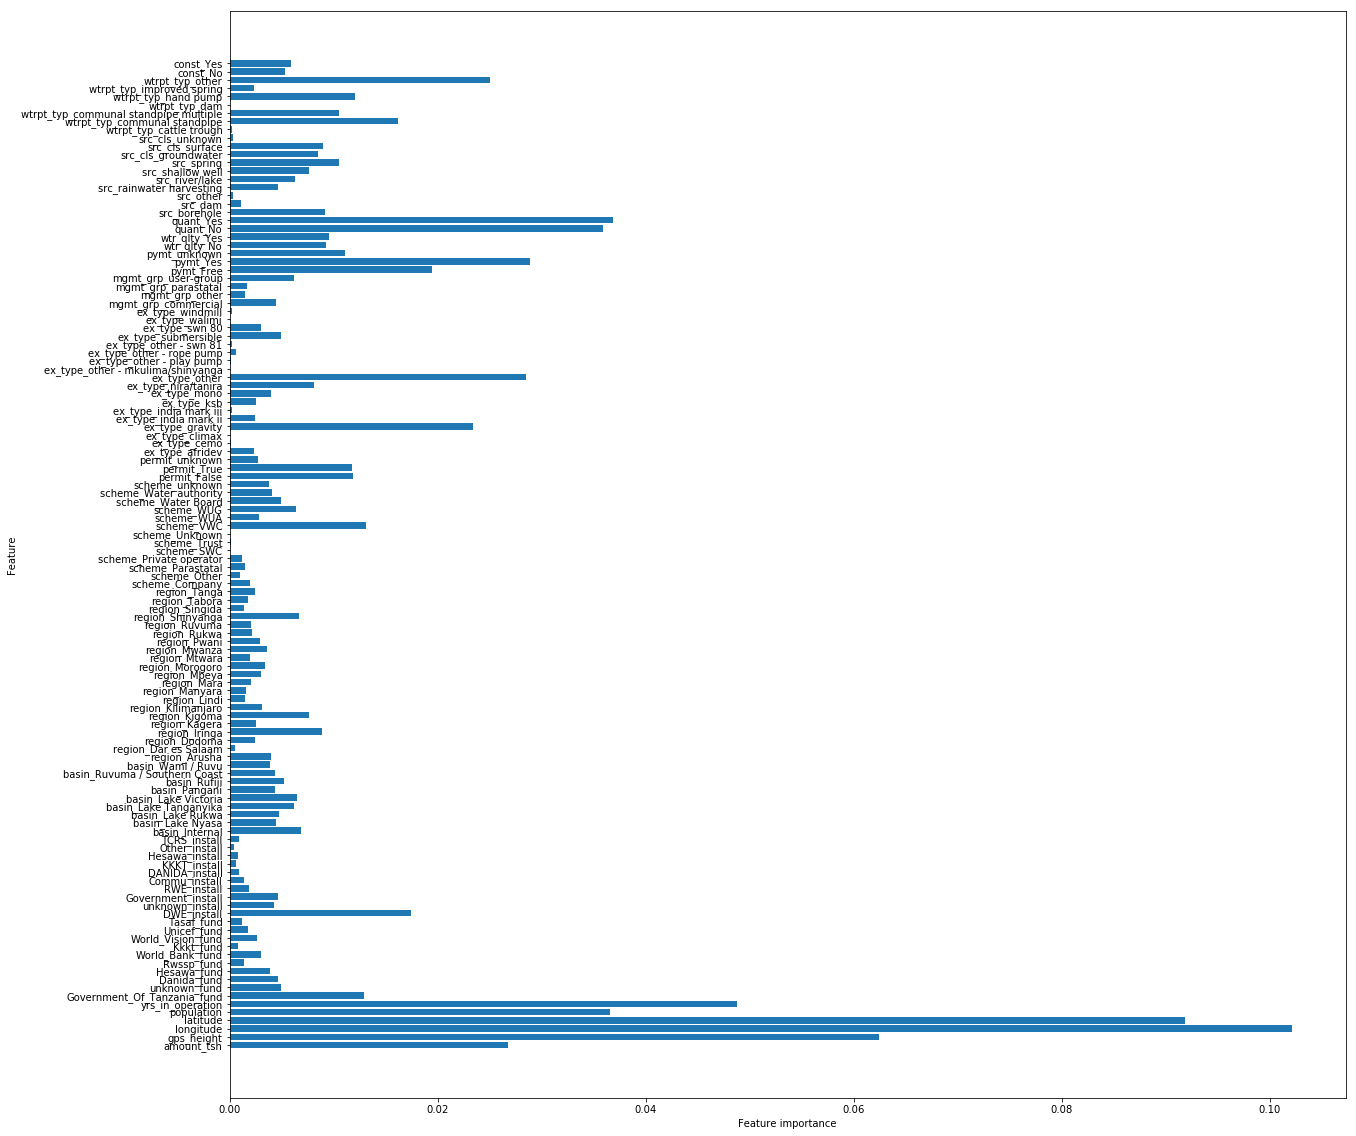

In [81]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rdm_forest_smote)

In [77]:
rdm_forest_smote.feature_importances_

array([2.67730897e-02, 6.24412597e-02, 1.02181446e-01, 9.18707296e-02,
       3.65987166e-02, 4.87501933e-02, 1.28858446e-02, 4.97832057e-03,
       4.67858421e-03, 3.91259896e-03, 1.38949606e-03, 3.05732961e-03,
       7.82369200e-04, 2.62308562e-03, 1.81751910e-03, 1.22042845e-03,
       1.74493266e-02, 4.22828057e-03, 4.68935576e-03, 1.87558327e-03,
       1.37926320e-03, 9.19755231e-04, 5.87647550e-04, 8.28685057e-04,
       4.41457891e-04, 8.90486923e-04, 6.82061779e-03, 4.49657426e-03,
       4.72496468e-03, 6.20037054e-03, 6.43639659e-03, 4.33218264e-03,
       5.27619469e-03, 4.38910155e-03, 3.89507033e-03, 3.99194562e-03,
       5.08404815e-04, 2.42272585e-03, 8.93181889e-03, 2.53566348e-03,
       7.61774187e-03, 3.10508884e-03, 1.52115574e-03, 1.62679655e-03,
       2.07784877e-03, 3.01223290e-03, 3.43054482e-03, 1.93457021e-03,
       3.60744734e-03, 2.92680247e-03, 2.14373234e-03, 2.09153459e-03,
       6.71436040e-03, 1.39925030e-03, 1.79280277e-03, 2.45154073e-03,
      

## K Nearest Neighbors

In [4]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

test_preds = knn.predict(X_test_scaled)

NameError: name 'X_train_scaled' is not defined

In [1]:
print(confusion_matrix(y_test, test_preds))
plt.figure(figsize=(12, 7));
plot_confusion_matrix(rdm_forest_smote, X_test_scaled, y_test, cmap=plt.cm.Blues);
plt.xticks(rotation=45);

# def print_metrics(labels, preds):
#     print("Precision Score: {}".format(precision_score(labels, preds)))
#     print("Recall Score: {}".format(recall_score(labels, preds)))
#     print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
#     print("F1 Score: {}".format(f1_score(labels, preds)))
    
# print_metrics(y_test, test_preds)

NameError: name 'confusion_matrix' is not defined

In [ ]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [ ]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

In [251]:
y.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [264]:
from imblearn.over_sampling import SMOTE

print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(sampling_strategy={'functional':4317, 'non functional':4317, 'functional needs repair':4317}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_scaled, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 24161 samples and 4317 samples are asked.

In [253]:
rdm_forest_smote = RandomForestClassifier(class_weight='balanced', random_state=42)

In [255]:
rdm_forest_smote.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [256]:
rdm_forest_smote.score(X_train_resampled, y_train_resampled)

0.9975994371093911

In [257]:
rdm_forest_smote.score(X_test_scaled, y_test)

0.788080808080808

In [258]:
y_preds = rdm_forest_smote.predict(X_test_scaled)

[[6769  486  843]
 [ 437  484  153]
 [1029  199 4450]]


<Figure size 864x504 with 0 Axes>

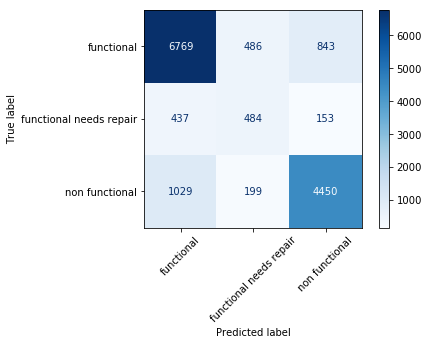

In [259]:
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, y_preds))
plt.figure(figsize=(12, 7));
plot_confusion_matrix(rdm_forest_smote, X_test_scaled, y_test, cmap=plt.cm.Blues);
plt.xticks(rotation=45);

In [260]:
print(classification_report(y_test, y_preds))

                         precision    recall  f1-score   support

             functional       0.82      0.84      0.83      8098
functional needs repair       0.41      0.45      0.43      1074
         non functional       0.82      0.78      0.80      5678

               accuracy                           0.79     14850
              macro avg       0.68      0.69      0.69     14850
           weighted avg       0.79      0.79      0.79     14850



**OKAY! This all looks great. Now we have a dataset without any missing values.  We can go ahead and save this as a cleaned CSV file so we can import it and use it in other exploration and modeling notebooks.**

In [35]:
df.to_csv('Testing Set - Cleaned.csv')

SystemError: <built-in method item of numpy.ndarray object at 0x0000022168D781C0> returned a result with an error set